# Data Cleansing & Analysis - Assignment

## Objectives

 - List the problems that the provided datatape ("real_estate_data.csv") has and how these can be fixed.
 - Fill all coordinates and locations missing in the datatape either precisely or approximately (using an additional mapping file provided "greek_localities.csv").
 - Describe statistically the data and provide insights (using appropriate metrics and informative graphs via visualization libraries).
 - Create an Excel workbook of the final cleansed dataset, which will be used for an interactive dashboard that shows a KPI of average prices and prices per sqm2 along with a distribution graph per user's selected location.

Installing the required libraries (in case they are not already installed in the environment).

In [1]:
# !pip install folium
# !pip install matplotlib
# !pip install numpy
# !pip install os
# !pip install pandas
# !pip install seaborn

Importing the required libraries:

In [2]:
import matplotlib.pyplot as plt  # library for plotting visualizations
import numpy as np  # library adding support to multi-dimensional arrays, matrices and functions to operate on these arrays
import os  # library for providing functions for interacting with the operating system
import pandas as pd  # library for the Python programming language for data manipulation and analysis
import seaborn as sns  # library for providing a high-level interface for drawing informative statistical visuals-graphics

In [3]:
import data_cleansing
data_cleansing

<module 'data_cleansing' from 'C:\\Users\\user\\Documents\\RealEstate_Assignment\\data_cleansing.py'>

In [4]:
# Finding the current directory in which the dataset is located
current_directory = os.getcwd()

file_name = os.path.join(current_directory, 'asking_data.csv')

In [5]:
# Reading the datatape into a dataframe
df = pd.read_csv(file_name, delimiter=';', on_bad_lines='warn', quotechar='"',
                 engine='python', index_col=0)

df.info()  # checking an overview of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 0 to 1978
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1979 non-null   object 
 1   price_m2           1979 non-null   object 
 2   area               1979 non-null   float64
 3   prop_type          1979 non-null   object 
 4   lat                1975 non-null   object 
 5   lng                1979 non-null   object 
 6   location           1977 non-null   object 
 7   bedrooms           1979 non-null   object 
 8   floor              1979 non-null   object 
 9   has_parking        1979 non-null   object 
 10  construction_year  1978 non-null   object 
dtypes: float64(1), object(10)
memory usage: 185.5+ KB


In [6]:
# Identifying which features have missing values and how many of them (count)
df.isnull().sum(axis=0)

price                0
price_m2             0
area                 0
prop_type            0
lat                  4
lng                  0
location             2
bedrooms             0
floor                0
has_parking          0
construction_year    1
dtype: int64

#### Handling each column separately for its strange values.

In [7]:
# Treatment for column: price_m2
df['price_m2'] = data_cleansing.DataCleansing(df, pd.DataFrame()).commaReplace('price_m2')

In [8]:
df.price_m2.iloc[144]  # example of a string value that has been correctly converted to float value

np.float64(1236.0)

The problem that the column "price_m2" has is that it is considered an object, since it contains both numeric (float) and non-numeric values (strings). This issue is addressed by replacing the characters identified in the feature (i.e., comma) with a dot and convert the whole column into float instead of object.

In [9]:
# Treatment for column: price
df['price'] = data_cleansing.DataCleansing(df, pd.DataFrame()).priceColumn('price', 'price_m2', 'area')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 0 to 1978
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1979 non-null   float64
 1   price_m2           1979 non-null   float64
 2   area               1979 non-null   float64
 3   prop_type          1979 non-null   object 
 4   lat                1975 non-null   object 
 5   lng                1979 non-null   object 
 6   location           1977 non-null   object 
 7   bedrooms           1979 non-null   object 
 8   floor              1979 non-null   object 
 9   has_parking        1979 non-null   object 
 10  construction_year  1978 non-null   object 
dtypes: float64(3), object(8)
memory usage: 250.1+ KB


The problem that the column "price" has is that it is considered an object, since it contains both numeric (float) and non-numeric values (strings). This issue is addressed by replacing the special characters identified in the feature (i.e., comma, dash) with a dot or even by completely removing the characters and with the help of an additional column (named "price_verif", as the product of columns "price_m2" and "area"), a confirmation of the correct values for column "price" has been granted and thus, the whole column is converted into float instead of object, since the issues have been resolved.

In [10]:
# Treatment for column: prop_type
df.prop_type.value_counts()

prop_type
Apartment      1543
Studio Flat     385
Villa            42
Studio flat       2
Studio_flat       1
Villas            1
Apartment_        1
Studio_Flat       1
ApartMent         1
Apartmnt          1
Studo Flat        1
Name: count, dtype: int64

In [11]:
# Performing a typical mapping for the different types of each property
df['prop_type'] = data_cleansing.DataCleansing(df, pd.DataFrame()).propertyTypeMapping('prop_type')

df.prop_type.value_counts()

prop_type
Apartment      1546
Studio Flat     390
Villa            43
Name: count, dtype: int64

The problem that the column "prop_type" has is that it contains several distinct entries for the same description of the type of the property (e.g., "Apartment", "Apartment_" for the Apartment type). This issue is addressed by mapping the values based on a simple common string among the values that are identified to belong to the same property type.

Note: The issues for this column could be enhanced with a more generalized RegEx (Regular Expression) in order to deal with potential cases with special characters and other problematic values.

In [12]:
# Treatment for coordinates columns: lat & lng (latitude, longitude)
df['lat'] = data_cleansing.DataCleansing(df, pd.DataFrame()).coordinatesColumns('lat')
df['lng'] = data_cleansing.DataCleansing(df, pd.DataFrame()).coordinatesColumns('lng')

C:\Users\user\Documents\RealEstate_Assignment\data_cleansing.py:174: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data[coordinate].fillna(0, inplace=True)
C:\Users\user\Documents\RealEstate_Assignment\data_cleansing.py:174: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

The problem that the columns "lat" and "lng" have is that they are considered objects, since they contain both numeric (float) and non-numeric values (strings). This issue is addressed by replacing the characters identified in each feature in order to be considered all float numbers and convert the whole column into float instead of object.

In [13]:
# Treatment for column: bedrooms
df.bedrooms.unique()

array(['2', '1', '3', '0', '4', '5', '8', '2 bedrooms', '1 bedoroom',
       '3 υπνοδωμάτια', '11', '7', '3,0', '1 bedoom'], dtype=object)

In [14]:
# Keeping only the numeric values from the strings that contain both the number of bedrooms and additional text 
df['bedrooms'] = data_cleansing.DataCleansing(df, pd.DataFrame()).bedroomsMapping('bedrooms')

df.bedrooms.unique()

array([ 2,  1,  3,  0,  4,  5,  8, 11,  7])

In [15]:
df.bedrooms.value_counts()

bedrooms
1     718
2     708
3     416
0      87
4      39
5       6
8       2
7       2
11      1
Name: count, dtype: int64

The problem that the column "bedrooms" has is that it is considered an object, since it contains both numeric (float) and non-numeric values (strings). Specifically, the string values contain both a number that corresponds to the number of bedrooms in the property and an additional text. This issue is addressed by keeping only the integer number identified in these strings.

In [16]:
# Treatment for column: has_parking
df.has_parking.value_counts()

has_parking
FALSE    1201
TRUE      771
no          4
yes         3
Name: count, dtype: int64

In [17]:
# Feature "has_parking" had several values for it and they were replaced with 1 if the house has a parking and with 0 otherwise
df['has_parking'] = data_cleansing.DataCleansing(df, pd.DataFrame()).parkingMapping('has_parking')

df.has_parking.value_counts()

has_parking
No     1205
Yes     774
Name: count, dtype: int64

The problem that the column "has_parking" has is that it contains several distinct values for describing the same characteristic of the property, either having a parking or not. This issue is addressed by mapping the different positive values (i.e., "yes" or "true") to the number 1 and the rest (i.e., "no" or "false") to the number 0.

In [18]:
df.describe()

,price,price_m2,area,lat,lng,bedrooms
count,1.979000e+03,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000
mean,1.182805e+05,1240.020718,93.278423,26.370213,15.637783,1.823648
std,2.965163e+05,774.803835,161.918178,18.322123,10.869361,0.962768
min,0.000000e+00,0.000000,15.000000,0.000000,0.000000,0.000000
25%,5.000000e+04,784.000000,52.000000,0.000000,0.000000,1.000000
50%,8.000000e+04,1068.000000,80.000000,37.629150,22.728727,2.000000
75%,1.300000e+05,1500.000000,105.000000,40.099396,22.956646,2.000000
max,1.060000e+07,7400.000000,5223.000000,41.149593,33.076237,11.000000


### Mapping locations to coordinates
Utilization of mapping file "greek_localities.csv" for matching the missing coordinates to the corresponding locations and vice versa.

In [19]:
# Reading the mapping file of locations to their coordinates
file_name_mapping = os.path.join(current_directory, 'greek_localities.csv')

df_mapping = pd.read_csv(file_name_mapping)
df_mapping

,Locality,pnt
0,"Grikou, Kea",POINT (24.3684964532 37.6215157574)
1,"Ioulida, Kea",POINT (24.3439609866 37.6383905831)
2,"Korissia, Kea",POINT (24.3123483152 37.6580148779)
3,"Orkos, Kea",POINT (24.3851075336 37.6102023124)
4,"Vourkari, Kea",POINT (24.3285006885 37.6658393768)
...,...,...
203,"Arkoudi, Vartholomio",POINT (21.1098399997 37.8469594104)
204,"Akrotiri, Main town area",POINT (20.9011299308 37.8041220151)
205,"Main town - Chora, Main town area",POINT (20.8977127 37.7780418)
206,"Varkiza, Vari - Varkiza",POINT (23.7978331247 37.8180146761)


In [20]:
# Removing 'POINT (' and ')' and splitting the remaining numbers into latitude and longitude
df_mapping[['lat', 'lng']] = df_mapping['pnt'].str.replace(
    'POINT (', '').str.replace(
    ')', '').str.split(' ', expand=True).astype(float)

# Dropping the column 'pnt' which had the whole coordinates of each location
df_mapping.drop(['pnt'], axis=1, inplace=True)

df_mapping.head()

,Locality,lat,lng
0,"Grikou, Kea",24.368496,37.621516
1,"Ioulida, Kea",24.343961,37.638391
2,"Korissia, Kea",24.312348,37.658015
3,"Orkos, Kea",24.385108,37.610202
4,"Vourkari, Kea",24.328501,37.665839


In [21]:
df_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Locality  208 non-null    object 
 1   lat       208 non-null    float64
 2   lng       208 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.0+ KB


In [22]:
df_mapping.describe()

,lat,lng
count,208.000000,208.000000
mean,23.454478,38.382536
std,1.393187,1.802884
min,20.186232,35.112695
25%,22.726360,37.080904
50%,23.120314,37.975760
75%,24.384710,40.163547
max,27.385102,41.138873


In [23]:
# Plotting the different locations on a map (based on their coordinates)
data_cleansing.DataCleansing(pd.DataFrame(), df_mapping).mapPlotting('lat', 'lng', 'Locality')

Based on the above map, we understand that the latitude and longitude of the coordinates from the mapping file "greek_localities.csv" might be in reverse, so we will try that.

In [24]:
df_mapping.rename(columns={'lat': 'lng', 'lng': 'lat'}, inplace=True)

In [25]:
# Plotting the different locations on a map (based on their coordinates)
data_cleansing.DataCleansing(pd.DataFrame(), df_mapping).mapPlotting('lat', 'lng', 'Locality')

For the rows of the initial dataset that there are no available coordinates (i.e., latitude and longitude) and no location, we have to prepare a separate treatment via the utilization of the mapping file for the coordinates and their corresponding locations.

Mapping the rows with missing locations based on the coordinates from the mapping file "greek_localities.csv" (with approximation of 5 decimal points for the latitude and longitude).

Filling the locations missing in the datatape based on the coordinates and the mapping file.

In [26]:
df_first_mapping = data_cleansing.DataCleansing(df, df_mapping).missingLocationMapping('lat', 'lng', 'location')

C:\Users\user\Documents\RealEstate_Assignment\data_cleansing.py:237: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data[location].fillna('-', inplace=True)


Filling the coordinates missing in the datatape based on the location and the mapping file.

In [27]:
df_second_mapping = data_cleansing.DataCleansing(df, df_mapping).missingCoordinatesMapping('lat', 'lng', 'location',
                                                                                           df_first_mapping)

In [28]:
# Verifying that the observation where neither location nor coordinates are provided is not mapped from the mapping file
df_second_mapping[df_second_mapping.location=='No location']

,price,price_m2,area,prop_type,lat,lng,location,bedrooms,floor,has_parking,construction_year,Locality
126,180000.0,1224.0,147.0,Apartment,NaN,NaN,No location,3,5,Yes,2007,NaN


Saving the cleaned version of the dataset, after resolving the different issues identified in its features and filling the missing locations and coordinates based on an additional mapping file with the greek localities.

This file will be used for the interactive dashboard that shows a KPI of average prices and prices per sqm2 along with a distribution graph per user's selected location.

In [ ]:
# Saving the df_second_mapping dataframe to an Excel workbook
df_dash = df_second_mapping[['price', 'price_m2', 'area', 'location']].copy()
df_dash['location'].fillna('No location', inplace=True)

df_dash.to_excel(os.path.join(current_directory,
                              'asking_data_BI.xlsx'), index=False)  # setting index=False to exclude the index

## Exploratory Data Analysis (EDA)

Analyzing the provided dataset to summarize its main characteristics, using statistical graphics and data visualization methods.

In [29]:
# Extracting some useful metrics per each feature of the cleansed dataset as a summary of its characteristics
df_second_mapping.describe()

,price,price_m2,area,lat,lng,bedrooms
count,1.990000e+03,1990.000000,1990.000000,1970.000000,1970.000000,1990.000000
mean,1.179885e+05,1238.287437,93.162312,39.111391,23.192112,1.823116
std,2.957296e+05,773.419952,161.484289,1.569897,1.044707,0.961223
min,0.000000e+00,0.000000,15.000000,34.697891,20.186230,0.000000
25%,5.000000e+04,784.000000,52.000000,37.572080,22.726748,1.000000
50%,8.000000e+04,1068.000000,80.000000,39.362910,22.892300,2.000000
75%,1.300000e+05,1500.000000,105.000000,40.593948,23.860080,2.000000
max,1.060000e+07,7400.000000,5223.000000,41.149593,33.076237,11.000000


In [30]:
# Creating a column named 'city' for the region in which the property is located
df_second_mapping['city'] = df_second_mapping['location'].str.split(', ').str[1]

# Depicting the regions with the most properties inside the datatape
df_second_mapping['city'].value_counts()

city
Kavala            192
Argos             190
Veroia            188
Asini             175
Xanthi            169
                 ... 
Nemea               1
Itanos              1
Main town area      1
Meganisi            1
Mistras             1
Name: count, Length: 115, dtype: int64

#### Depicting the top 10 locations with the highest price_m2 (price per sqm2).

In [31]:
df_second_mapping.groupby('location')['price_m2'].mean().reset_index().sort_values(by='price_m2', ascending=False).head(10)

,location,price_m2
4,"Agia Marina, Koropi",7273.000000
6,"Akrotiri, Main town area",7179.000000
196,"Sintagma, Kentro",5467.000000
148,"Ligaria, Gazi",5263.000000
112,"Gaios, Paxoi",5244.000000
140,"Kosta, Kranidi",5000.000000
169,"Ornos, Mykonos",4835.333333
176,"Paroikia, Paros",4667.000000
105,"Elia, Mykonos",4616.333333
175,"Paraspori, Siteia",4615.000000


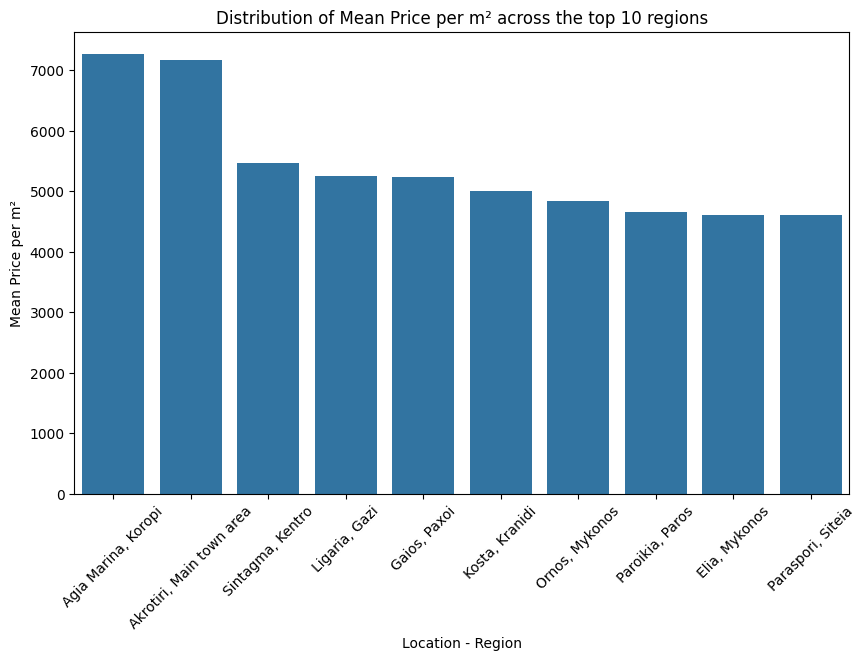

In [32]:
# Creating a barplot using seaborn to visualize the distribution of top 10 locations with the highest price_m2 (price per sqm2)
plt.figure(figsize=(10, 6))
df_new_top10 = df_second_mapping.groupby('location')['price_m2'].mean().reset_index().sort_values(by='price_m2',
                                                                                            ascending=False).head(10)

# Using seaborn's barplot function to create the plot
sns.barplot(data=df_new_top10, x='location', y='price_m2')
plt.xlabel('Location - Region')
plt.xticks(rotation=45)  # adjusting the angle as needed in order to present the whole name
plt.ylabel('Mean Price per m²')
plt.title('Distribution of Mean Price per m² across the top 10 regions')
plt.show()

#### Depicting the bottom 10 locations with the lowest price_m2 (price per sqm2).

In [33]:
df_second_mapping.groupby('location')['price_m2'].mean().reset_index().sort_values(by='price_m2', ascending=False).tail(10)

,location,price_m2
160,"Nea Chora, Chania",500.0
87,"Centre, Argos",423.0
27,"Center, Almiros",409.0
72,"Center, Siteia",408.0
96,"Dato, Filippoi",278.0
20,"Aroni, Akrotiri",260.0
190,"Rachi, Veroia",243.0
124,"Kallithea, Sikies",200.0
116,"Glyfada, Pilos",11.0
129,"Katomeri, Meganisi",0.0


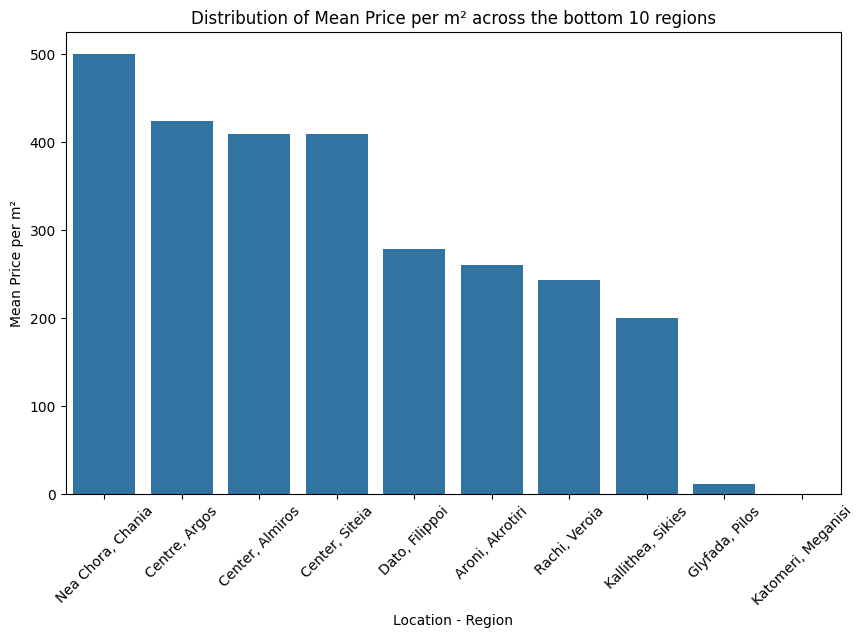

In [34]:
# Creating a barplot using seaborn to visualize the distribution of bottom 10 locations with the lowest price_m2
plt.figure(figsize=(10, 6))
df_new_bottom10 = df_second_mapping.groupby('location')['price_m2'].mean().reset_index().sort_values(by='price_m2',
                                                                                            ascending=False).tail(10)

# Using seaborn's barplot function to create the plot
sns.barplot(data=df_new_bottom10, x='location', y='price_m2')
plt.xlabel('Location - Region')
plt.xticks(rotation=45)  # adjusting the angle as needed in order to present the whole name
plt.ylabel('Mean Price per m²')
plt.title('Distribution of Mean Price per m² across the bottom 10 regions')
plt.show()

#### Depicting the impact that the existence of parking for the property has on its price per square meter (price_m2).

In [35]:
df_second_mapping.groupby('has_parking')['price_m2'].mean().reset_index().sort_values(by='price_m2', ascending=False).head(10)

,has_parking,price_m2
1,Yes,1439.016710
0,No,1109.436469


#### Taking a random location with multiple values (e.g., "Center, Chania") and depicting the impact of several parameters of the property on its price per square meter (price_m2).

In [36]:
result = (
    df_second_mapping[df_second_mapping['location'] == 'Center, Chania']
    .groupby(['has_parking', 'floor', 'area', 'construction_year'])['price_m2']
    .agg(mean_price_m2='mean', count='size')
    .reset_index()
    .sort_values(by='mean_price_m2', ascending=False)
    .head(10)
)
result

,has_parking,floor,area,construction_year,mean_price_m2,count
10,Yes,3,60.0,2012,2667.0,1
9,Yes,2,55.0,2007,2364.0,1
3,No,3,60.0,1983,1950.0,1
4,No,3,91.0,1983,1648.0,1
7,No,Ground floor,50.0,1978,1360.0,1
6,No,Ground floor,38.0,1980,1316.0,2
1,No,1,115.0,1978,1209.0,1
2,No,2,126.0,1954,1190.0,1
0,No,1,85.0,1980,1094.0,1
5,No,Basement,70.0,1975,971.0,1


Generally, it is observed that when the property has parking, it is located on an upper floor and is more recently constructed compared to the others, its price per square meter rises, which is the most intuitive outcome. 

#### Depicting the impact that several features, such as the location, the floor and the area in square meters, have on the property's price per square meter (price_m2).

In [37]:
result2 = (
    df_second_mapping
    .groupby(['location', 'floor', 'area'])['price_m2']
    .agg(mean_price_m2='mean', count='size')
    .reset_index()
    .sort_values(by='mean_price_m2', ascending=False)
    .head(20)
)
result2

,location,floor,area,mean_price_m2,count
1331,"Rest of Saronida, Saronida",Ground floor,500.0,7400.000000,1
11,"Agia Marina, Koropi",Ground floor,220.0,7273.000000,1
13,"Akrotiri, Main town area",2,390.0,7179.000000,1
1106,"Elia, Mykonos",1,45.0,5978.000000,1
1261,"Ornos, Mykonos",Ground floor,61.0,5738.000000,1
1255,"Ornos, Mykonos",1,32.0,5625.333333,3
1259,"Ornos, Mykonos",Basement,105.0,5524.000000,1
1337,"Sintagma, Kentro",2,15.0,5467.000000,2
1213,"Ligaria, Gazi",2,133.0,5263.000000,1
1257,"Ornos, Mykonos",1,38.0,5263.000000,2


#### Depicting the difference in the price per square meter for a greek island and for a city (2 distinct cases with multiple properties have been considered) based on several features.

In [38]:
# Checking which cities and islands are observed to have multiple properties
df_second_mapping.city.value_counts().head(20)

city
Kavala       192
Argos        190
Veroia       188
Asini        175
Xanthi       169
Nafplio      160
Volos        144
Larisa        66
Pylea         47
Tavros        34
Agrinio       33
Paros         29
Perama        26
Kalamaria     26
Sparti        24
Thermi        23
Naousa        20
Mykonos       18
Evosmos       18
Arta          17
Name: count, dtype: int64

In [39]:
result3 = (
    df_second_mapping[df_second_mapping['city'] == 'Kavala']  # the city for the purposes of comparison
    .groupby(['has_parking', 'floor', 'area', 'construction_year'])['price_m2']
    .agg(mean_price_m2='mean', count='size')
    .reset_index()
    .sort_values(by='mean_price_m2', ascending=False)
    .head(10)
    .reset_index(drop=True)
)
result3

,has_parking,floor,area,construction_year,mean_price_m2,count
0,No,2,90.0,Under construction,3556.0,1
1,Yes,Ground floor,164.0,2006,2744.0,1
2,No,1,50.0,1970,2500.0,1
3,No,1,50.0,1975,2500.0,1
4,Yes,7,120.0,1999,2500.0,1
5,No,3,100.0,1968,2400.0,1
6,No,Ground floor,100.0,Under construction,2200.0,1
7,No,4,140.0,-,2143.0,1
8,Yes,Ground floor,83.0,2009,2108.0,1
9,Yes,5,120.0,2001,2083.0,1


In [40]:
result4 = (
    df_second_mapping[df_second_mapping['city'] == 'Mykonos']  # the island for the purposes of comparison
    .groupby(['has_parking', 'floor', 'area', 'construction_year'])['price_m2']
    .agg(mean_price_m2='mean', count='size')
    .reset_index()
    .sort_values(by='mean_price_m2', ascending=False)
    .head(10)
    .reset_index(drop=True)
)
result4

,has_parking,floor,area,construction_year,mean_price_m2,count
0,No,1,32.0,2000,6250.0,1
1,No,1,45.0,-,5978.0,1
2,Yes,Ground floor,61.0,1982,5738.0,1
3,Yes,Basement,105.0,2000,5524.0,1
4,No,1,32.0,1985,5313.0,2
5,No,1,38.0,1982,5263.0,1
6,Yes,1,38.0,1982,5263.0,1
7,No,1,35.0,1985,5143.0,1
8,No,1,69.0,2006,5072.0,1
9,No,Ground floor,70.0,1999,4571.0,1


In [41]:
# Adding a column named 'city' column to each result's dataset
result3['city'] = 'Kavala'
result4['city'] = 'Mykonos'

# Combining the results
combined_results = pd.concat([result3, result4])

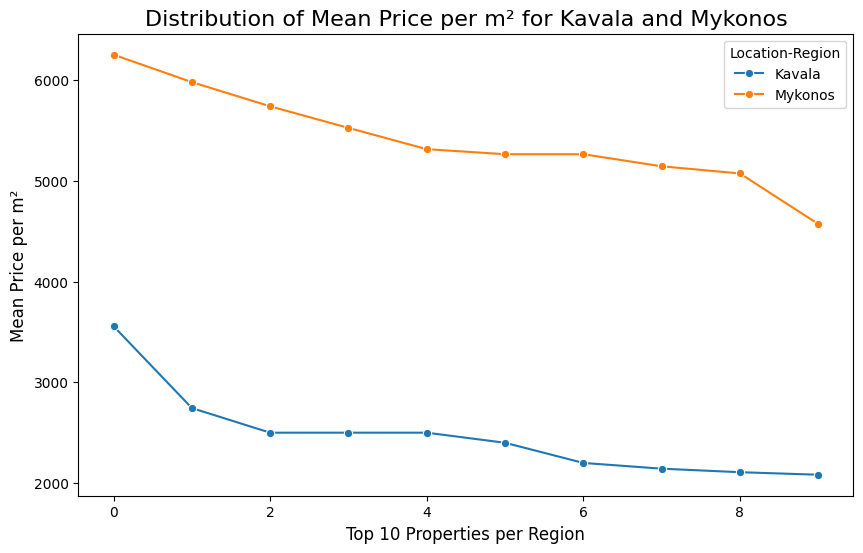

In [42]:
# Creating a line plot using seaborn to visualize the distribution between the 2 selected regions (city vs island)
plt.figure(figsize=(10, 6))

# Using seaborn's lineplot function to create the plot
sns.lineplot(data=combined_results, x=combined_results.index, y='mean_price_m2', hue='city', marker='o')

plt.title('Distribution of Mean Price per m² for Kavala and Mykonos', fontsize=16)
plt.xlabel('Top 10 Properties per Region', fontsize=12)
plt.ylabel('Mean Price per m²', fontsize=12)
plt.legend(title='Location-Region')
plt.show()

It is observed that the properties in an island and especially in Mykonos have higher prices per square meter compared to a city in the continental Greece, like Kavala, which is the most intuitive outcome.

#### For the 2 cities, for which the biggest amount of properties is observed (apart from Kavala which was already compared against Mykonos), a barplot of the center and any other region inside the same city, tries to identify whether there is a pattern of higher prices per area (sqm2) for the center compared to the other areas (suburbs).  

In [43]:
# Filtering data for the 2 cities with the most properties besides Kavala for which we presented an analysis
cities = ['Argos', 'Veroia']
filtered_data = df_second_mapping[df_second_mapping['city'].isin(cities)]

# Categorizing locations as "Center" or "Other"
filtered_data['Region'] = filtered_data['location'].apply(lambda x: 'Center' if 'Center' in x else 'Other')

# Grouping by city and region, calculating the mean price per m2
summary = (
    filtered_data.groupby(['city', 'Region'])['price_m2']
    .mean()
    .reset_index()
    .rename(columns={'price_m2': 'mean_price_m2'})
)

C:\Users\user\AppData\Local\Temp\ipykernel_8212\579472218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Region'] = filtered_data['location'].apply(lambda x: 'Center' if 'Center' in x else 'Other')


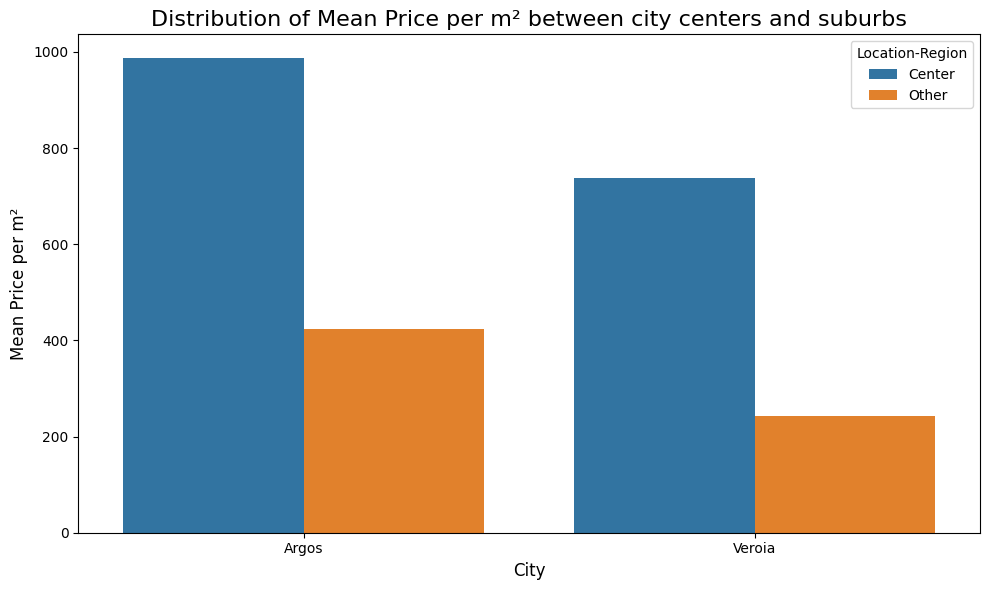

In [44]:
# Creating a line plot using seaborn to visualize the distribution between the 2 selected regions (city vs island)
plt.figure(figsize=(10, 6))

# Using seaborn's lineplot function to create the plot
sns.barplot(data=summary, x='city', y='mean_price_m2', hue='Region')

plt.title('Distribution of Mean Price per m² between city centers and suburbs', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Mean Price per m²', fontsize=12)
plt.legend(title='Location-Region')
plt.tight_layout()

plt.show()

### Exporting the requirements.txt file

In [ ]:
pip freeze > requirements.txt